Sonia Bouden
# TP Chaines de Markov et HMM

On veut générer des mots dans une langue donnée en modélisant la formation de ces mots par
une chaîne de Markov.

#### Imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### I.1 Fonctions dont vous pouvez avoir besoin

In [23]:
data_p = './data_txt_compact/'
data_b = '../'

La correspondance entre la valeur numérique d’un état et un caractère est la suivante : l’état 1
correspond à un espace (avant le début d’un mot) et l’état 28 à celui d’un espace en fin de mot. Les états 2 à 27 correspondent aux caractères de a à z.

In [24]:
dic = {'1' : ' ', '2' : 'a', '3' : 'b', '4': 'c', '5' : 'd', '6' : 'e', '7': 'f', '8' : 'g', '9' : 'h', '10': 'i', '11': 'j',
'12' : 'k', '13' : 'l', '14': 'm', '15' : 'n', '16' : 'o', '17': 'p', '18' : 'q', '19' : 'r' , '20': 's', '21' : 't', '22'
: 'u', '23': 'v', '24' : 'w', '25' : 'x' , '26': 'y', '27' : 'z', '28' : ' ' }
dic_inv = {v: k for k, v in dic.items()}
dic_inv # les valeurs deviennent les clés et réciproquement

{' ': '28',
 'a': '2',
 'b': '3',
 'c': '4',
 'd': '5',
 'e': '6',
 'f': '7',
 'g': '8',
 'h': '9',
 'i': '10',
 'j': '11',
 'k': '12',
 'l': '13',
 'm': '14',
 'n': '15',
 'o': '16',
 'p': '17',
 'q': '18',
 'r': '19',
 's': '20',
 't': '21',
 'u': '22',
 'v': '23',
 'w': '24',
 'x': '25',
 'y': '26',
 'z': '27'}

In [5]:
dic = {'1' : ' ', '28' : ' ' }
dic_inv = {v: k for k, v in dic.items()}
dic_inv

{' ': '28'}

##### Attention!! 
on remarque que la valeur '1' est perdue et sa clé est associée à l'état espace '28'.

### II. Chaîne de Markov
#### 2.a Matrice de transitions

'bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux
symboles (caractères ou espaces).

In [25]:
big_eng = 'bigramenglish.txt'
eng = np.loadtxt(big_eng)
eng.shape

(28, 28)

Le terme générique (i,j) de la matrice de transition correspond à la probabilité de transiter vers l’état j à partir de l’état i. 

La première ligne (1,j) de la matrice de transition correspond à la probabilité de transiter de l'état initial 1 aux autres états j.

Les termes de la dernière colonne (i,n) correspondent aux probabilités de passer d'un état i à l'état final n.

#### Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.

In [5]:
[dic[str(x+1)] for x in eng.argmax(axis=1)]

['t',
 'n',
 'e',
 'o',
 ' ',
 ' ',
 ' ',
 ' ',
 'e',
 'n',
 'o',
 ' ',
 'e',
 'e',
 ' ',
 'n',
 'e',
 'u',
 'e',
 ' ',
 'h',
 'r',
 'e',
 'a',
 't',
 ' ',
 'e',
 ' ']

La lettre la plus fréquente en début de mot est le t.

#### I.2.b Générer un mot à partir de l'état initial (espace de début de mot)

In [26]:
def etat_suivant(etat_t, mat_transition):
    unif = np.random.random()
    cs = np.cumsum(mat_transition[int(etat_t)])  # on commence par l'état 1
    x = cs > unif
    etat_suiv = list(x).index(True)+1
    return etat_suiv

In [27]:
etat_suivant(1,eng)

13

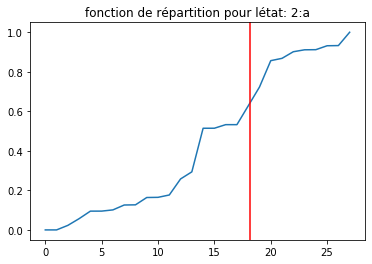

In [16]:
plt.plot(np.cumsum(eng[1]))
plt.title('fonction de répartition pour l''état: 2:a')
plt.axvline(np.random.random()*28, c='red')
plt.show()

La fonction de répartition permet de sélectionner l'état suivant à partir d'une variable aléatoire tirée selon une loi uniforme, en choisissant l'état correspondant au segment dans lequel la variable tirée appartient.

In [28]:
#### Méthode du corrigé

def etat_suivant_c(ligne_A):
    unif = np.random.random()
    cs = np.cumsum(ligne_A)
    state = 0
    while (unif >= cs[state]):
        state = state+1
    return state+1
etat_suivant_c(eng[1])

15

#### Utiliser cette fonction pour écrire la fonction genere_state_seq qui génère une séquence d’états jusqu’à aboutir à l’état final (28).

In [29]:
def genere_state_seq(mat):
    state = 1
    seq = [state]
    while state != 28:
        next_state = etat_suivant(state, mat)
        seq.append(next_state)
        state = next_state
    return seq

In [30]:
genere_state_seq(eng)

[1, 15, 20, 28]

#### Ecrire une fonction display_seq qui transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire.

In [31]:
def display_seq(seq_state):
    seq_carac = [dic[str(x)] for x in seq_state]
    pl = ''.join(seq_carac)
    pl = pl.replace(' ','')
    return pl

In [68]:
display_seq(genere_state_seq(eng))

'lerts'

#### Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés.

In [37]:
mots =''
for i in range(20):
    mots = mots+' '+display_seq(genere_state_seq(eng))
print(mots)

 tceeaooueiuioe cshnnr nngeaioaae rae trueitf  tshs fhoetpuie ke tnf tshnfo tshloreor nwpuealeor nuealetnf nnueaeeiueoye tnnr d l tlee nveuiae


### I.2.c Générer une phrase
On veut générer une suite de mots (phrase). Créer un état final de phrase (état 29, correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est 0.1. Ecrire une fonction modifie_mat_dic qui modifie la matrice de transition et le dictionnaire en conséquence. Donner des exemples de phrases générées.

In [43]:
def modifie_mat_dic(mat):
    global dic
    global dic_inv
    global eng
    global fr
    
    dic['29'] = '.'
    dic_inv['.'] = '29'
    mat = np.c_[mat, np.zeros((28,1))]
    mat = np.r_[mat, np.zeros((1,29))]
    mat[-2,-1] = 0.1
    mat[-2,-2] = 0
    mat[-2,0] = 0.9
    return mat

In [51]:
# def display(seq_state):
#     seq_carac = [dic[str(x)] for x in seq_state]
#     pl = ''.join(seq_carac)
#     pl = pl.replace(' ','')
#     pl = pl+'.'
#     return pl

In [55]:
display_seq(genere_state_seq(eng))

'ioer'

In [48]:
modif_eng = modifie_mat_dic(eng)
modif_fr = modifie_mat_dic(fr)

In [36]:
display_seq(genere_state_seq(modif_eng))

' asst  hild  wrmalllen  e  pren  wemymilteral  th  emere  th  i  hait  ansty  wonfof  me  fte  is  cof  bed  st  onond  thet  bete  w  spr  whesto  abe  anvindit  t  saveer  e .'

### I.3. Reconnaissance de la langue

In [45]:
big_fr = 'bigramfrancais.txt'
fr = np.loadtxt(big_fr)
fr.shape

(28, 28)

In [46]:
genere_state_seq(fr)

[1, 23, 10, 16, 16, 6, 20, 19, 28]

In [63]:
mots =''
for i in range(10):
    mots = mots+' '+display_seq(genere_state_seq(modif_fr))
mots = mots+'.'
print(mots)

  nr sr ueeuearoroeiioopuueear lmtxs nnnuioefefiuorueorsiefr bioeealefiq pueiaiueigaoaw tieor pueieieikeooarieiueeeo.


In [64]:
display(genere_state_seq(modif_fr))

'nnnuor.'

In [67]:
modif_fr = modifie_mat_dic(fr)
display_seq(genere_state_seq(fr))

'pueiz'

In [68]:
dic2 ={1 : '+', 2 : 'a', 3 : 'b',4: 'c',5 : 'd',6 : 'e',7: 'f',8 : 'g',9 : 'h',10: 'i',11: 'j',12 : 'k',13 : 'l', 14: 'm', 15 : 'n', 16 : 'o', 17: 'p', 18 : 'q', 19 : 'r' , 20: 's', 21 : 't', 22 : 'u', 23: 'v', 24 : 'w',25 : 'x' , 26: 'y', 27 : 'z', 28 : '-', 29 : '.'}
dic2_inv = {v: k for k, v in dic.items()}
dic2_inv

{' ': '28',
 'a': '2',
 'b': '3',
 'c': '4',
 'd': '5',
 'e': '6',
 'f': '7',
 'g': '8',
 'h': '9',
 'i': '10',
 'j': '11',
 'k': '12',
 'l': '13',
 'm': '14',
 'n': '15',
 'o': '16',
 'p': '17',
 'q': '18',
 'r': '19',
 's': '20',
 't': '21',
 'u': '22',
 'v': '23',
 'w': '24',
 'x': '25',
 'y': '26',
 'z': '27',
 '.': '29'}

In [69]:
def calc_vraisemblance(dic, seq, mat):
    seq = '-'+seq.replace(' ','+-')+'+.'
    p = 1
    dic_inv = {v: k for k, v in dic.items()}
    seq1 = [dic_inv[x] for x in seq] 
    
    for i,j in list(zip(seq1[:-1], seq1[1:])):
        #if (mat[int(i)-1].any() !=0 and mat[int(j)-1].any() !=0):
        print(mat[int(i)-1])
        print(mat[int(j)-1])
        p*=mat[int(i)-1,int(j)-1]
    return p

In [70]:
calc_vraisemblance(dic2, 'to be or not to be', modif_eng)

[0.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1]
[0.0000000e+00 3.5948616e-02 1.2569446e-05 3.7708339e-03 1.2569446e-04
 8.4466678e-02 5.0277785e-04 1.2569446e-05 3.3937505e-01 8.9494457e-02
 1.2569446e-05 1.2569446e-05 1.3072224e-02 1.0055557e-03 1.5083335e-03
 8.8865985e-02 1.2569446e-04 1.2569446e-05 3.0418060e-02 2.0613892e-02
 1.9482642e-02 1.8602780e-02 1.2569446e-05 9.0500013e-03 1.2569446e-05
 2.0739586e-02 1.2569446e-05 2.2273059e-01 0.0000000e+00]
[0.0000000e+00 3.5948616e-02 1.2569446e-05 3.7708339e-03 1.2569446e-04
 8.4466678e-02 5.0277785e-04 1.2569446e-05 3.3937505e-01 8.9494457e-02
 1.2569446e-05 1.2569446e-05 1.3072224e-02 1.0055557e-03 1.5083335e-03
 8.8865985e-02 1.2569446e-04 1.2569446e-05 3.0418060e-02 2.0613892e-02
 1.9482642e-02 1.8602780e-02 1.2569446e-05 9.0500013e-03 1.2569446e-05
 2.0739586e-02 1.2569446e-05 2.2273059e-01 0.0000000e+00]
[0.0000000e+00 7.3598497e-03 1.0335108e-02 1.4406514e-02

0.0

On remarque que la multiplication de probabibilité nulle va annuler à un moment la probabilité finale, on décide de procéder comme suit:

In [71]:
def calc_vraisemblance(dic, eng, fr, seq) :
    p_eng = 1
    p_fr = 1
    ke = 0
    
    for l in seq :
        kf = [k for k, v in dic.items() if v == l][0] - 1   #on s'arrête à l'index 29 d'ou le -1

        p_eng = p_eng * eng[ke, kf]
        p_fr = p_fr * fr[ke, kf]

        ke = [k for k, v in dic.items() if v == l][0] - 1  #on s'arrête à l'index 29 d'ou le -1
    
    if p_eng > p_fr :
        print("It's English !")
    else :
        print("c'est en Français!") 
    return p_eng, p_fr

In [72]:
calc_vraisemblance(dic2, modif_eng, modif_fr, 'etre-+ou-+ne-+pas-+etre-.')

c'est en Français!


(4.462288711775253e-24, 1.145706887234789e-19)

In [73]:
calc_vraisemblance(dic2, modif_eng, modif_fr, 'to-+be-+or-+not-+to-+be-.')

It's English !


(8.112892227809415e-20, 5.9602081018686406e-30)

### HMM
L’objectif de cette partie est de générer des séquences d’observations suivant un modèle de Markov Caché donné, puis de calculer la vraisemblance d’une séquence d’observations suivant un modèle de Markov Caché donné.

Le modèle de Markov est de type discret. Les classes de caractères (classes 0, 1, 7) sont modélisées chacune par un modèle à Q=5 états de type gauche-droite. Les états 1 et 5 correspondent à des colonnes de pixels de type fond de l’image (niveau 0). Les états 2, 3 et 4 correspondent au début, milieu et fin du caractère respectivement. Les transitions entre états sont indiquées dans la matrice de transitions A de taille QxQ. Les vecteurs π sont tous égaux à π=(1 0 0 0 0). Les séquences d’états commencent donc toujours par l’état q 1 =1.

Les séquences d’observations sont discrètes et issues d’images de chiffres de la base MNIST.
Les séquences d’observations consistent en séquences d’index (symboles) des éléments du dictionnaire. 

L’élément numéro i d’une séquence d’observations correspond au
symbole i et donc à la colonne i de la matrice v. Un symbole correspond à une configuration
de colonne de 5 pixels (binaires : noir/blanc). Il y a 2 5 =32 configurations, et donc symboles
possibles.

Les probabilités des observations dans chaque état sont indiquées dans la matrice B (32
lignes, 5 colonnes).

In [74]:
v = np.loadtxt('./data_txt_compact/matrice_symboles.txt')
v

array([[0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
        0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.]])

### II. 2. Génération de séquences d’observations

In [75]:
from pathlib import Path
p = Path('./data_txt_compact/')

for name in p.glob('*.txt'):
    print(str(name)[17:])

vect_pi7.txt
SeqTest0.txt
A0.txt
B7.txt
matrice_symboles.txt
SeqTest1.txt
SeqTest7.txt
A1.txt
B1.txt
vect_pi0.txt
A7.txt
B0.txt
vect_pi1.txt


In [76]:
A0 = np.loadtxt('./data_txt_compact/A0.txt')  #Matrice A
A1 = np.loadtxt('./data_txt_compact/A1.txt')

B0 = np.loadtxt('./data_txt_compact/B0.txt')  #MatriceB
vect_p0 = np.loadtxt('./data_txt_compact/vect_pi0.txt')   #Vecteur pi
dic = np.loadtxt('./data_txt_compact/matrice_symboles.txt')   #matrice symboles (dictionnaire)
B1 = np.loadtxt('./data_txt_compact/B1.txt')  #MatriceB pour le chiffre 1
B7 = np.loadtxt('./data_txt_compact/B7.txt')  #MatriceB pourle chiffre 7

### II. 2. Génération de séquences d’observations

- La matrice A contient les transitions entre états... Un état qui est nul signifie que la probabilité de transition d'un état à l'autre est nulle. on note (q_t = s_i) le fait que l’état observé à l’instant t est s_i. 
Le pixel est noir.

- La matrice B représente les probabilités d’observation des symboles de v. 

- Pi est le vecteur des probabilités initiales du HMM.

La suite cachée correspond à la suite des états q1, q2,...,qT , notée Q(1 : T), où les qi
prennent leur valeur parmi l’ensemble des n états du modèle {s1, s2,...,sn}.

La suite observable correspond à la séquence des d’observations O1, O2,...,OT , notée O(1 :
T), où les Oi sont des lettres d’un alphabet de M symboles observables V = {v1, v2,...,vM}.

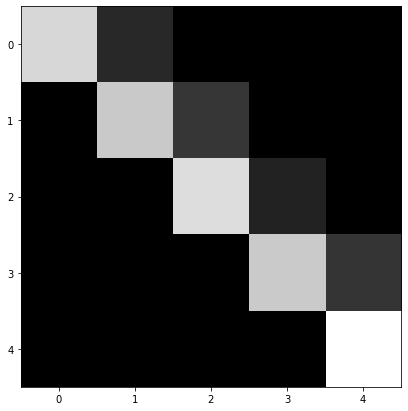

In [77]:
plt.figure(figsize=(15,7))
plt.imshow(A0, cmap='gray')

In [78]:
def etat_suivant_ligne(ligne_A):
    unif = np.random.random()
    cs = np.cumsum(ligne_A)
    state = 0
    while (unif >= cs[state]):
        state = state+1
    return state+1
etat_suivant_ligne(A0[2])

3

In [49]:
state = 2
np.cumsum(A0[2])[state]

0.86339743

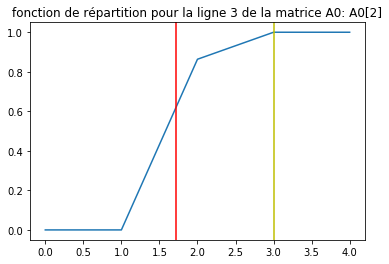

In [51]:
plt.plot(np.cumsum(A0[2]))
plt.title('fonction de répartition pour la ligne 3 de la matrice A0: A0[2]')
plt.axvline(np.random.random()*5, c='red')
plt.axvline(3, c='y')
plt.show()

Lorsque l'on prend une ligne i de la matrice A0, on remarque que la transition de l'état i à i+1 est indiquée à l'index i; Les valeurs avant étant nulles, en cumulant la somme on tombe rapidement sur cet index et on connait donc l'état suivant. Dans notre cas, l'état 3 étant le suivant, c'est le premier état ou l'on arrive à une probabilité de transition égale à 1.

In [79]:
def etat_suivant_q(state_t, mat):
    unif = np.random.random()
    cs = np.cumsum(mat[state_t])
    x = cs > unif
    state_t1 = list(x).index(True)
    return state_t1+1
etat_suivant_q(2, A0)

3

#### II.2.3 Générer une séquence d’observations suivant le modèle de Markov Caché du chiffre 0.

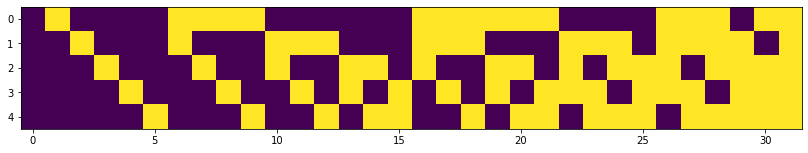

In [80]:
plt.figure(figsize=(14,5))
plt.imshow(v)

In [318]:
def generate_seq():
    seq = []
    state = 0
    while state !=5:
        n_state = etat_suivant_q(state,A0)
        seq.append(n_state)
        state = n_state
    return seq
generate_seq()

[1, 2, 3, 4, 5]

In [319]:
def generate_obs(state,mat):
    unif = np.random.random()
    cs = np.cumsum(mat[:,state])
    x = cs > unif
    idx = list(x).index(True)
    obs = v[:,idx]
    return obs
tst0 = generate_obs(2,B1)
tst0

array([0., 1., 1., 1., 0.])

In [87]:
tst1 = generate_obs(1,B1)
tst1

array([0., 1., 0., 0., 0.])

In [88]:
j = np.hstack((tst0,tst1)).reshape(-1,1)

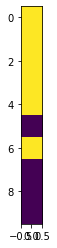

In [89]:
plt.imshow(j)

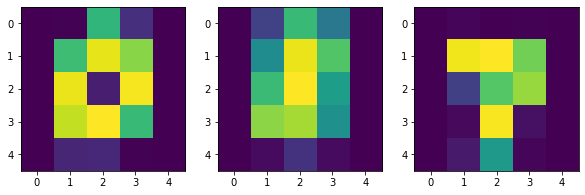

In [90]:
data = {'B0': B0,
        'B1': B1,
        'B7': B7}

plt.figure(figsize=(10,10))

plt.subplot(131)
plt.imshow(v@data['B0'])

plt.subplot(132)
plt.imshow(v@data['B1'])

plt.subplot(133)
plt.imshow(v@data['B7'])
plt.show()

In [329]:
def generate_obs(state):
    x = np.cumsum(B0[:,state])>np.random.random()
    idx = list(x).index(True)
    obs = v[:,idx]
    return obs
#generate_obs(2)

In [324]:
def generate_seq():
    seq = []
    state = 0
    while state !=5:
        n_state = etat_suivant_q(state,A0)
        seq.append(n_state)
        state = n_state
    return seq
generate_seq()

[1, 2, 3, 4, 5]

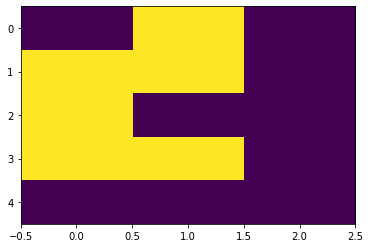

In [142]:
plt.imshow(np.hstack([generate_obs(s).reshape(-1,1) for s in generate_seq()]), interpolation='none', aspect='auto')

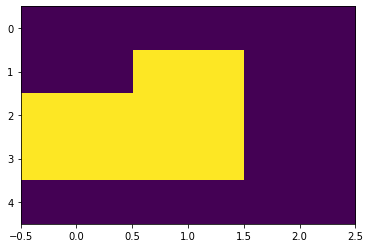

In [167]:
plt.imshow(np.hstack([generate_obs(s).reshape(-1,1) for s in generate_seq()]), interpolation='none', aspect='auto')

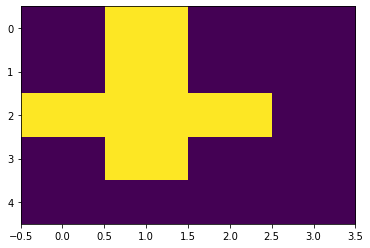

In [148]:
plt.imshow(np.hstack([generate_obs(s).reshape(-1,1) for s in generate_seq()]), interpolation='none', aspect='auto')

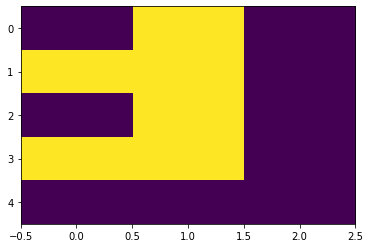

In [149]:
plt.imshow(np.hstack([generate_obs(s).reshape(-1,1) for s in generate_seq()]), interpolation='none', aspect='auto')

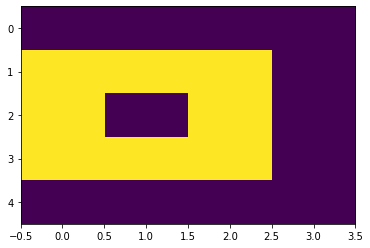

In [151]:
plt.imshow(np.hstack([generate_obs(s).reshape(-1,1) for s in generate_seq()]), interpolation='none', aspect='auto')

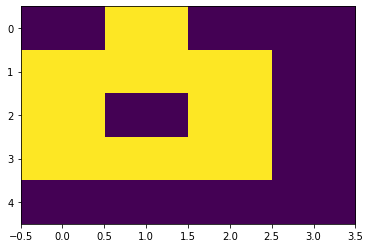

In [152]:
plt.imshow(np.hstack([generate_obs(s).reshape(-1,1) for s in generate_seq()]), interpolation='none', aspect='auto')

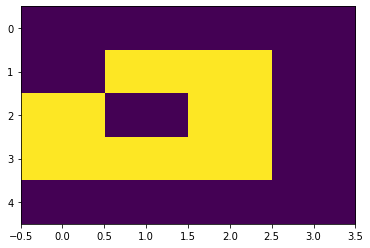

In [166]:
plt.imshow(np.hstack([generate_obs(s).reshape(-1,1) for s in generate_seq()]), interpolation='none', aspect='auto')

In [335]:
# im = []
# for t in range (0,len(generate_seq())):
#     im.append([generate_obs(s).reshape(-1,1) for s in generate_seq()])
# #im = np.array(im).T # now make an array
# im
# #plt.imshow(im*255, interpolation='none', aspect='auto')
#zero = generate_obs(generate_seq(),B0)

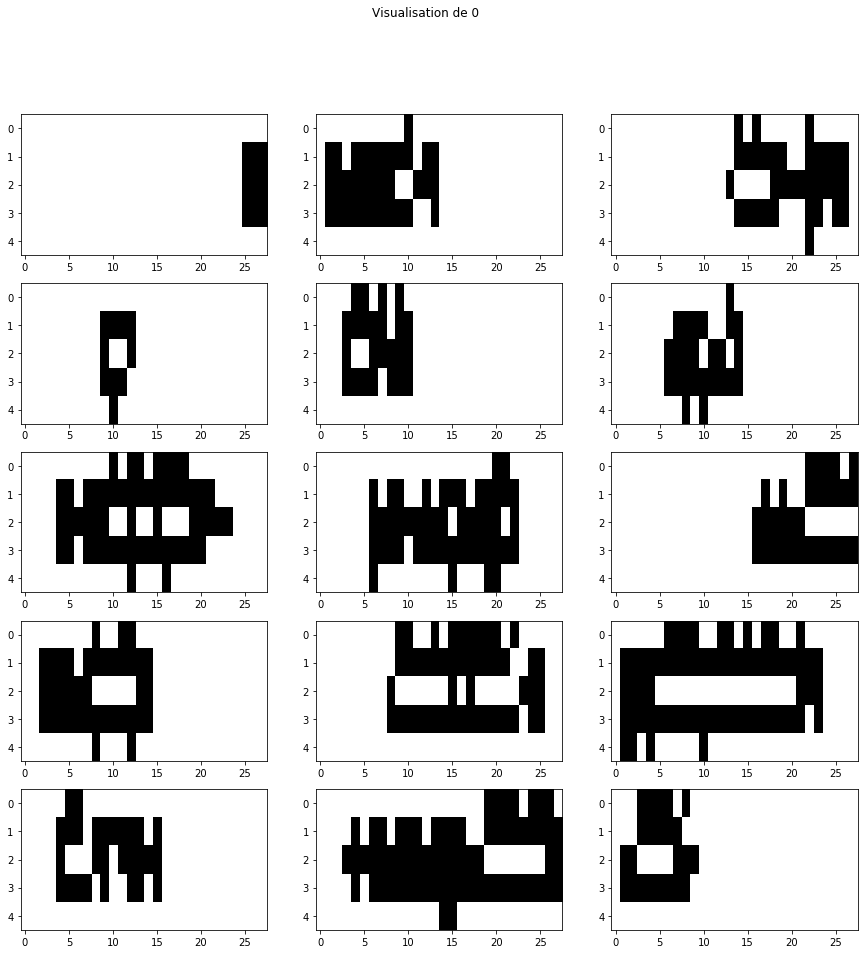

In [341]:
fig, ax = plt.subplots(3,5,figsize=(15,15))
fig.suptitle("Visualisation de 0")

n = 15

for i in range(n):
    i = i+1
    ax1 = plt.subplot(5,3,i)
    zero = generate_obs(generate_seq(),B0)
   
    im=[] 
    # zero contient les index dans le dictionnaire
    
    for t in range (0,len(zero)):
        im_col=v[:, zero[t]-1] 
        im.append(im_col)

    im = np.array(im).T # now make an array
    ax1.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')

plt.show()

### II.3. Calcul de la vraisemblance de séquences d’observations
Les fichiers SeqTest0.txt, SeqTest1.txt, SeqTest7.txt contiennent chacun 10 séquences
d’observations de chiffres des 3 classes 0, 1 et 7, disposés en ligne. Le script suivant extrait la
5 ème observation de la 3 ème séquence des chiffres 0.

In [222]:
filename='SeqTest0.txt'
TestChiffres=np.loadtxt(data_p+filename)
ieme_seq = 2 
  
seq = TestChiffres[ieme_seq, : ]  #3eme seq
seq[4] #5ème observation de la 3ème seq

1.0

In [234]:
TestChiffres.shape
q = 2
Obs_seq = TestChiffres[q,:]
len(Obs_seq)

28

Calculer la vraisemblance de ces séquences suivant chacun des modèles (0, 1 et 7) par l’algorithme de Viterbi (on pourra implémenter la version logarithmique de cet algorithme). Pour cela les matrices A, B et π seront converties en logarithmes (utiliser np.log).

In [344]:
def viterbi(V, a, b, pi, Obs_seq):
    
    V = V-1
    T = V.shape[0] # number of states
    print(T)
    
    N = len(Obs_seq) # length of observation sequence
    print(N)

    M = a.shape[0]
    print(M)
    
    #b = b / np.sum(b, axis=1).reshape((-1, 1))
        
    T = V.shape[0] 
    M = a.shape[0]
 
    omega = np.zeros((T, M))
    omega[0, :] = np.log(pi * b[:, V[0]])
 
    prev = np.zeros((T - 1, M))
 
    for t in range(1, T):
        for j in range(M):
            # Same as Forward Probability
            probability = omega[t - 1] + np.log(a[:, j]) + np.log(b[j, V[t]])
 
            # This is our most probable state given previous state at time t (1)
            prev[t - 1, j] = np.argmax(probability)
 
            # This is the probability of the most probable state (2)
            omega[t, j] = np.max(probability)
 
    # Path Array
    S = np.zeros(T)
 
    # Find the most probable last hidden state
    last_state = np.argmax(omega[T - 1, :])
 
    S[0] = last_state
    
    log_vraisemblance = omega[-1, last_state]
 
    backtrack_index = 1
    for i in range(T - 2, -1, -1):
        S[backtrack_index] = prev[i, int(last_state)]
        last_state = prev[i, int(last_state)]
        backtrack_index += 1
 
    # Flip the path array since we were backtracking
    S = np.flip(S, axis=0)
 
    return log_vraisemblance

In [345]:
viterbi(TestChiffres[0,:].astype(int),A0,B0.T,vect_p0, Obs_seq)

28
28
5


/home/sonia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/home/sonia/.local/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


-29.208426705363717

On a un message d'erreur concernant la division par 0 dans le log. En réalité, on ne divise pas par 0 mais par un nombre très petit. Pour y remédier, on peut dès le départ prendre le max entre a, b et un nombre très petit proche de 0 mais qui ne l'est pas. 

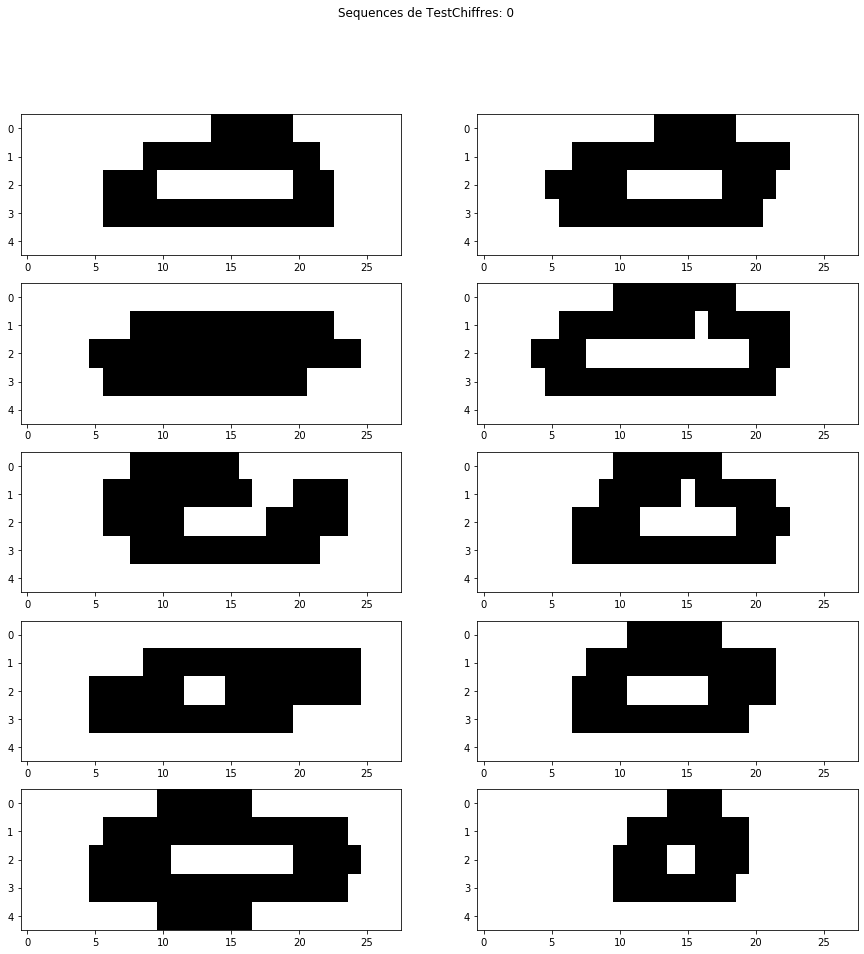

In [354]:
fig, ax = plt.subplots(2,5,figsize=(15,15))
fig.suptitle("Sequences de TestChiffres: 0")
n = 10

for i in range(n):
    ax1 = plt.subplot(5,2,i+1)
   
    im=[]
    for t in range(28):
        im_col=v[:,int(TestChiffres[i,t]-1)] 
        im.append(im_col)

    im = np.array(im).T # now make an array
    ax1.imshow(im*255, cmap='Greys', interpolation='none', aspect='auto')

plt.show()